In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Data Preprocessing
# Load the dataset
df = pd.read_csv(r'C:/m.py/insurance.csv')
# Display the number of rows and columns in the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Handle missing values (if any)
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)


The dataset contains 1338 rows and 7 columns.
Missing Values:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [3]:
# Encode categorical variables and create a summary table
def encode_and_create_summary(df, column):
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    categories = le.classes_
    encoded_values = le.transform(categories)
    return categories, encoded_values

sex_categories, sex_encoded = encode_and_create_summary(df, 'sex')
smoker_categories, smoker_encoded = encode_and_create_summary(df, 'smoker')
region_categories, region_encoded = encode_and_create_summary(df, 'region')

# Creating a summary table
encoding_summary = {
    'Category': ['sex'] * len(sex_categories) + ['smoker'] * len(smoker_categories) + ['region'] * len(region_categories),
    'Original Value': list(sex_categories) + list(smoker_categories) + list(region_categories),
    'Encoded Value': list(sex_encoded) + list(smoker_encoded) + list(region_encoded)
}

encoding_summary_df = pd.DataFrame(encoding_summary)
print(encoding_summary_df)

  Category Original Value  Encoded Value
0      sex         female              0
1      sex           male              1
2   smoker             no              0
3   smoker            yes              1
4   region      northeast              0
5   region      northwest              1
6   region      southeast              2
7   region      southwest              3


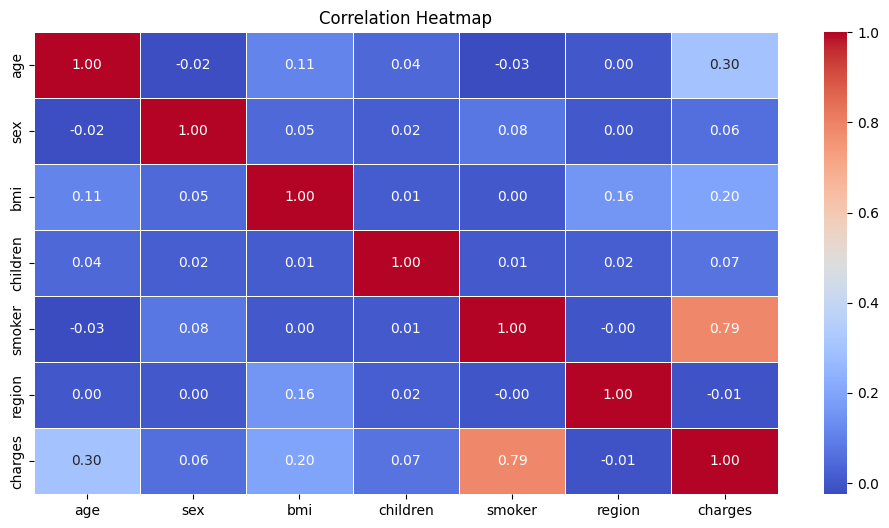

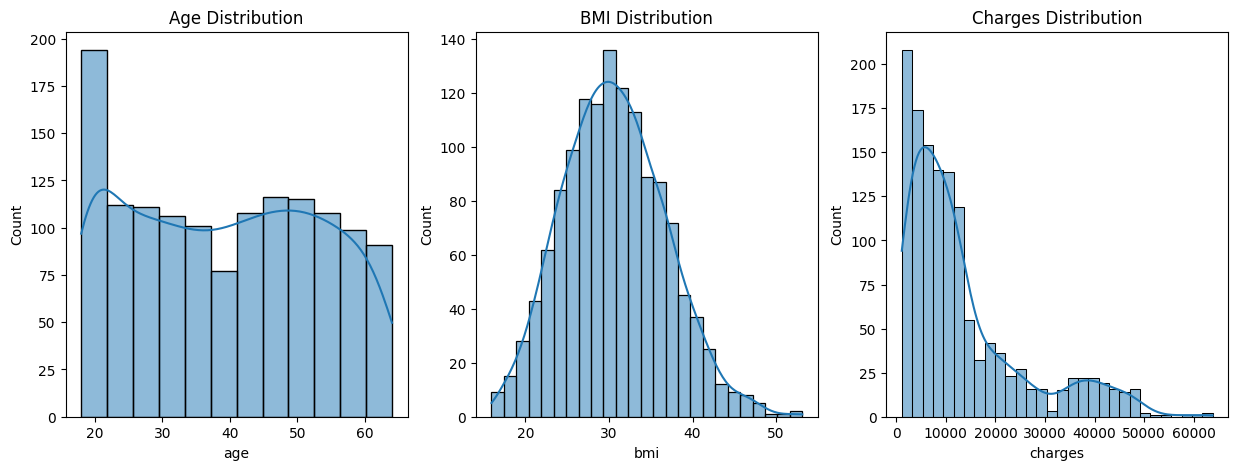

In [4]:
# Step 2: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('BMI Distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['charges'], kde=True)
plt.title('Charges Distribution')
plt.show()

In [5]:
# Step 3: Feature Engineering
# Standardize the continuous features
scaler = StandardScaler()
df[['age', 'bmi', 'children']] = scaler.fit_transform(df[['age', 'bmi', 'children']])


In [6]:
# Step 4: Model Selection
# Define features and target
X = df.drop('charges', axis=1)
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R²': r2}

# Print model evaluation metrics
print("\nModel Evaluation Metrics:")
for name, metrics in results.items():
    print(f"{name}:")
    print(f"  MSE: {metrics['MSE']:.2f}")
    print(f"  MAE: {metrics['MAE']:.2f}")
    print(f"  R² Score: {metrics['R²']:.2f}")
    print()


Model Evaluation Metrics:
Linear Regression:
  MSE: 33635210.43
  MAE: 4186.51
  R² Score: 0.78

Decision Tree:
  MSE: 43571584.99
  MAE: 2938.36
  R² Score: 0.72

Random Forest:
  MSE: 21096940.96
  MAE: 2498.47
  R² Score: 0.86

Gradient Boosting:
  MSE: 18997699.15
  MAE: 2448.34
  R² Score: 0.88



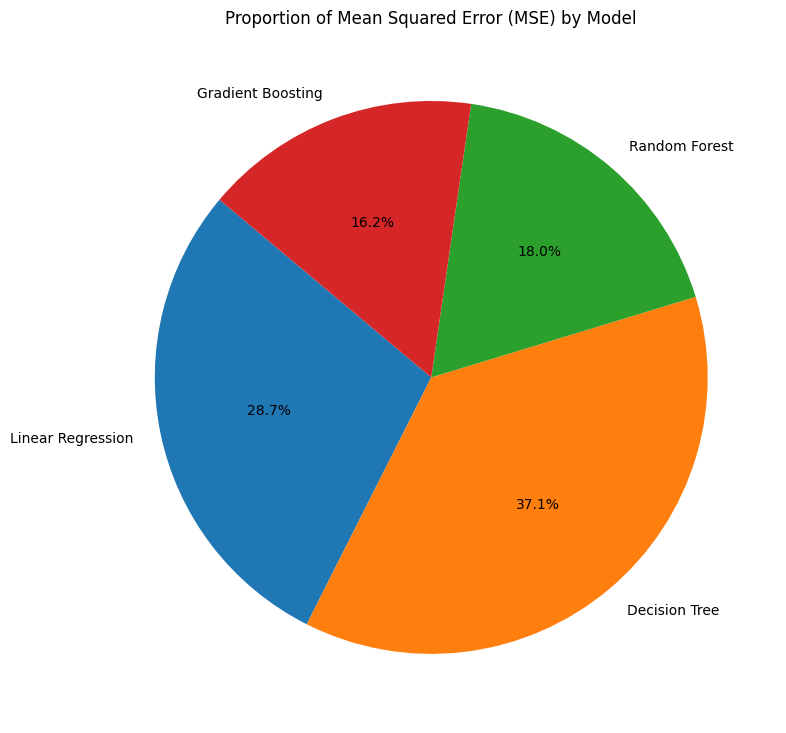

In [7]:
# Create pie charts for MSE, MAE, and R²
mse_values = [metrics['MSE'] for metrics in results.values()]
mae_values = [metrics['MAE'] for metrics in results.values()]
r2_values = [metrics['R²'] for metrics in results.values()]
models_names = list(results.keys())

# MSE Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(mse_values, labels=models_names, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Mean Squared Error (MSE) by Model')
plt.tight_layout()
plt.savefig('mse_pie_chart.png', bbox_inches='tight')
plt.show()

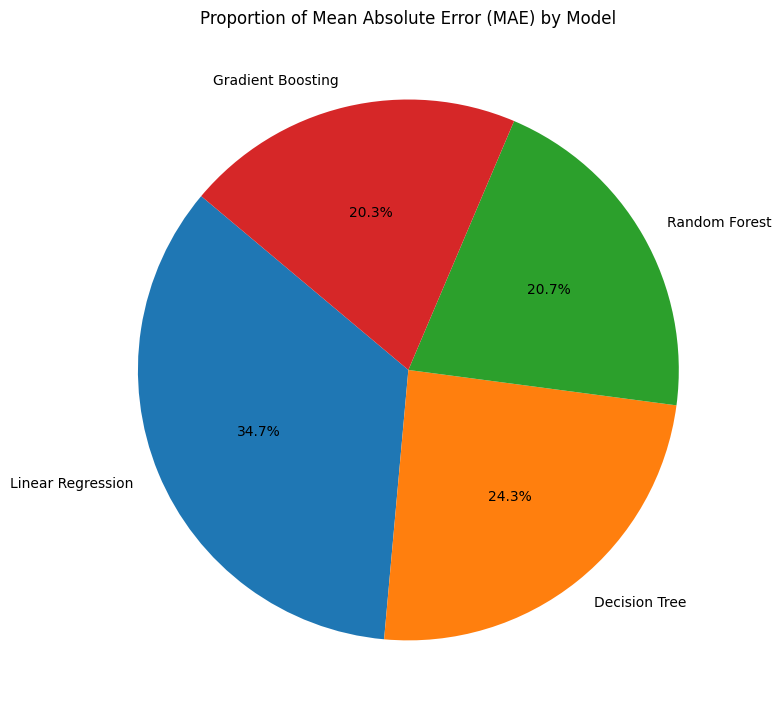

In [8]:
# MAE Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(mae_values, labels=models_names, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Mean Absolute Error (MAE) by Model')
plt.tight_layout()
plt.savefig('mae_pie_chart.png', bbox_inches='tight')
plt.show()



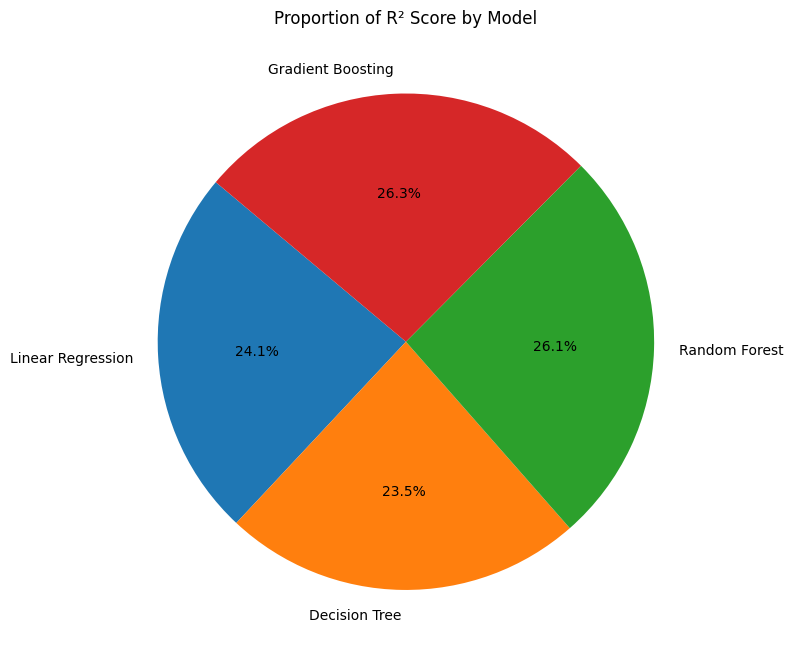

In [11]:
# R² Score Pie Chart
# Normalize R² values for pie chart to have positive values
r2_values_normalized = [val - min(r2_values) + 1 for val in r2_values]

plt.figure(figsize=(8, 8))
plt.pie(r2_values_normalized, labels=models_names, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of R² Score by Model')
plt.tight_layout()
plt.savefig('r2_pie_chart.png', bbox_inches='tight')
plt.show()


In [14]:
# Determine the best model based on each metric
best_model_mse = min(results, key=lambda x: results[x]['MSE'])
best_model_mae = min(results, key=lambda x: results[x]['MAE'])
best_model_r2 = max(results, key=lambda x: results[x]['R²'])

print(f"Best Model based on MSE: {best_model_mse}")
print(f"  MSE: {results[best_model_mse]['MSE']:.2f}")
print(f"  MAE: {results[best_model_mse]['MAE']:.2f}")
print(f"  R² Score: {results[best_model_mse]['R²']:.2f}")

print(f"Best Model based on MAE: {best_model_mae}")
print(f"  MSE: {results[best_model_mae]['MSE']:.2f}")
print(f"  MAE: {results[best_model_mae]['MAE']:.2f}")
print(f"  R² Score: {results[best_model_mae]['R²']:.2f}")

print(f"Best Model based on R²: {best_model_r2}")
print(f"  MSE: {results[best_model_r2]['MSE']:.2f}")
print(f"  MAE: {results[best_model_r2]['MAE']:.2f}")
print(f"  R² Score: {results[best_model_r2]['R²']:.2f}")

Best Model based on MSE: Gradient Boosting
  MSE: 18997699.15
  MAE: 2448.34
  R² Score: 0.88
Best Model based on MAE: Gradient Boosting
  MSE: 18997699.15
  MAE: 2448.34
  R² Score: 0.88
Best Model based on R²: Gradient Boosting
  MSE: 18997699.15
  MAE: 2448.34
  R² Score: 0.88


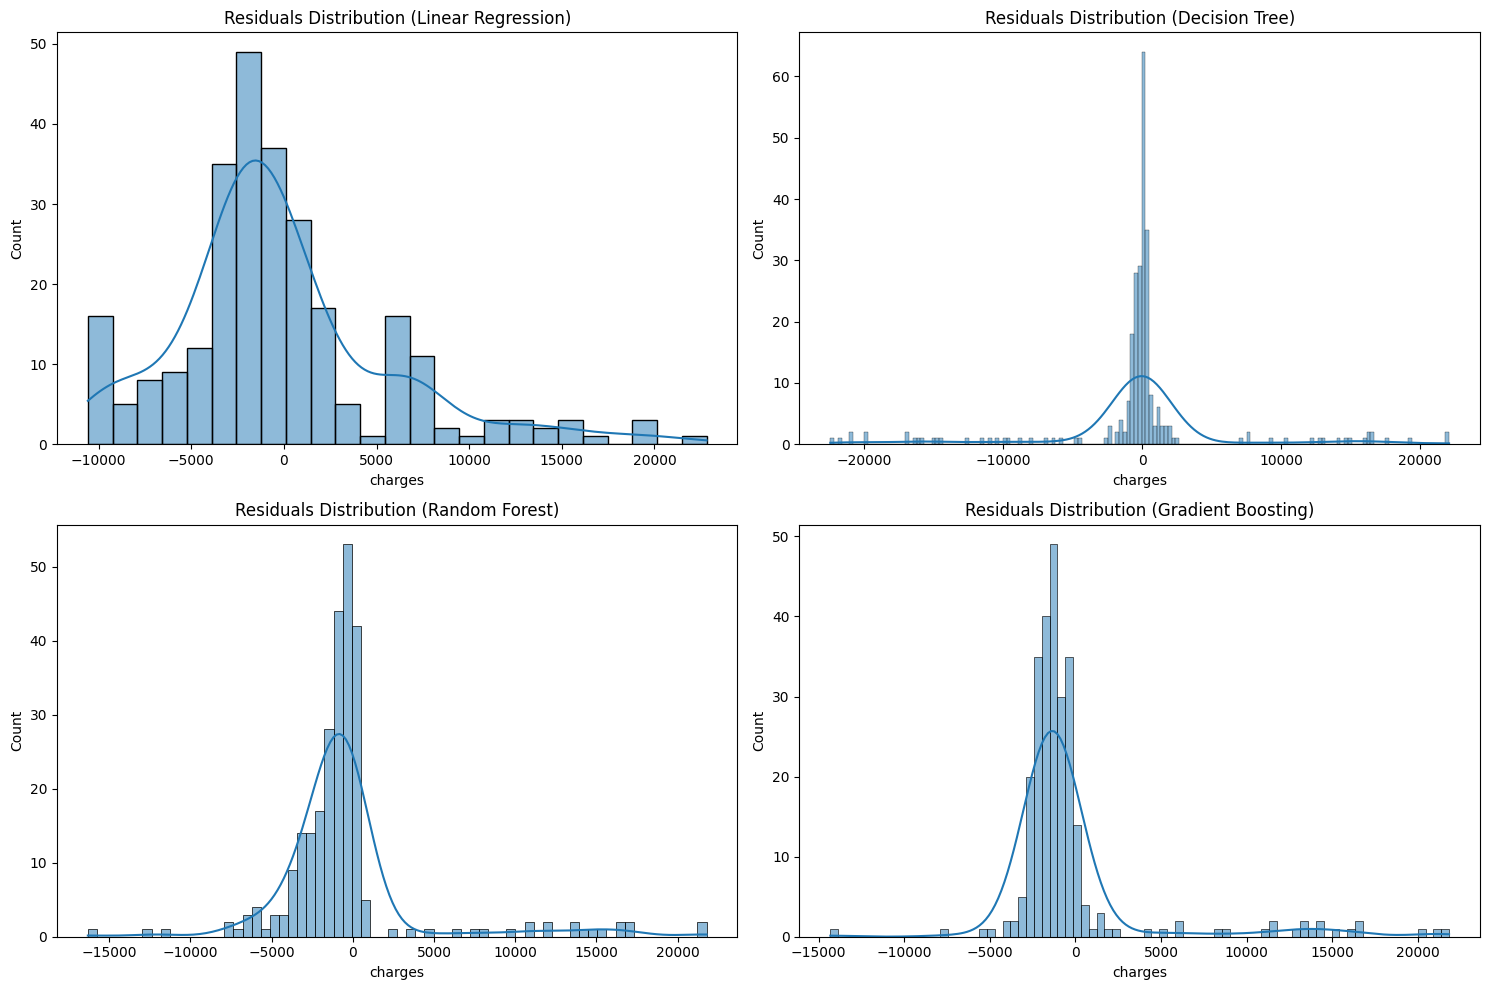

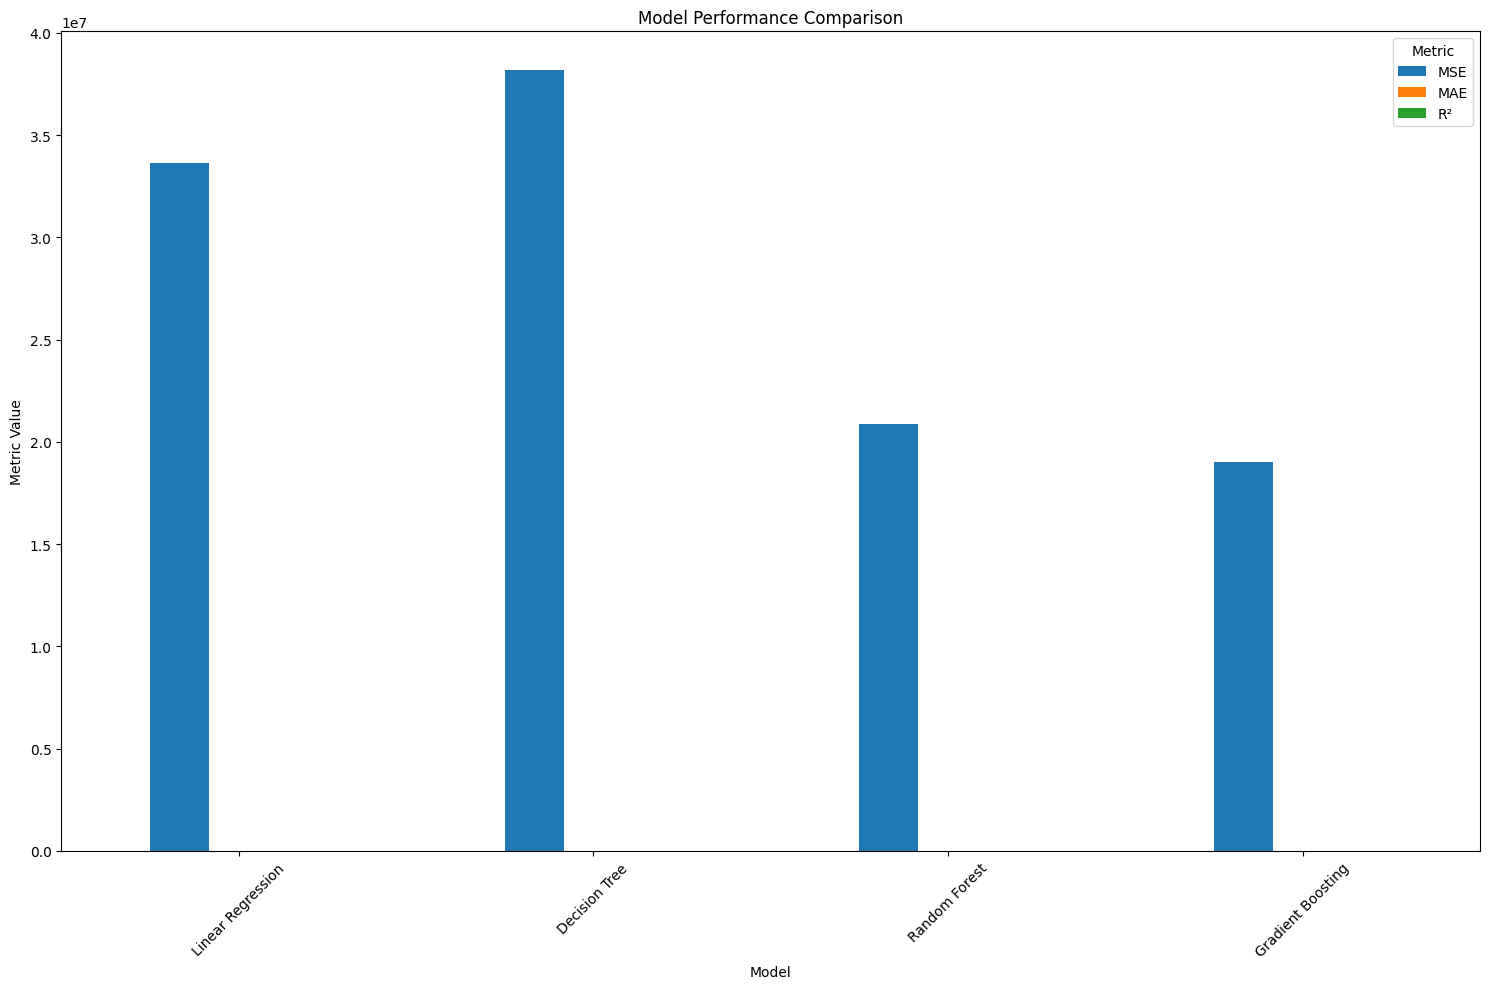

In [13]:
# Step 5: Visualization
# Create histograms for residuals of each model
plt.figure(figsize=(15, 10))

for i, (name, model) in enumerate(models.items(), 1):
    plt.subplot(2, 2, i)
    residuals = y_test - model.predict(X_test)
    sns.histplot(residuals, kde=True)
    plt.title(f'Residuals Distribution ({name})')

plt.tight_layout()
plt.savefig('residuals_distribution.png', bbox_inches='tight')
plt.show()

# Bar chart to compare model performance based on MSE, MAE, and R²
metrics_df = pd.DataFrame(results).T
metrics_df.plot(kind='bar', figsize=(15, 10))
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.savefig('model_performance_comparison.png', bbox_inches='tight')
plt.show()